# OpenCV template matching test

In [1]:
import numpy as np
import cv2
import os
import sys
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12, 5

1. Load the first to frames of test video

In [63]:
INPUT_VIDEO="../../../data/footage/wall-scan.avi"
cap =  cv2.VideoCapture(INPUT_VIDEO)  
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)
ret, frame1 = cap.read()
ret, frame2 = cap.read()

2. Define template

In [64]:
h_margin = 40
w_margin = 60
x0=(h_margin,w_margin)
template_block=frame1[h_margin:(height-h_margin),w_margin:(width-w_margin)]

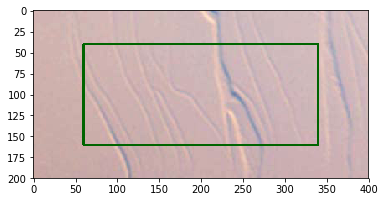

In [65]:
frame1_copy = frame1.copy()
cv2.rectangle(frame1_copy, (x0[1],x0[0]),(width-x0[1],height-x0[0]),(0,100,0),2 )
plt.imshow(frame1_copy)

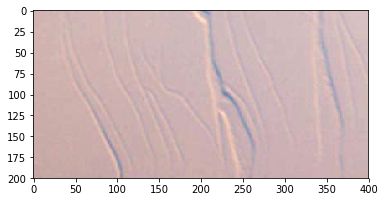

In [34]:
plt.imshow(frame2)

3. Seek template using matchTemplate()

Template position in frame 2 (red rectangle):  (50, 40)
Displacement vector:  10 0


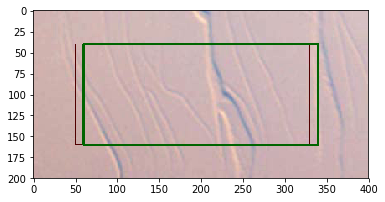

In [82]:
result = cv2.matchTemplate(frame2, template_block, cv2.TM_SQDIFF)
cv2.normalize( result, result, 0, 1, cv2.NORM_MINMAX, -1 )
_minVal, _maxVal, minLoc, maxLoc = cv2.minMaxLoc(result, None)
matchLoc = minLoc

frame2_copy = frame2.copy()

# Template from previous frame
cv2.rectangle(
    frame2_copy, 
    matchLoc,
    (matchLoc[0] + template_block.shape[1], matchLoc[1] + template_block.shape[0] ), 
    (80,0,0),1
)

# Current frame block
cv2.rectangle(
    frame2_copy, 
    (x0[1],x0[0]),
    (x0[1] + template_block.shape[1], x0[0] + template_block.shape[0] ), 
    (0,100,0),2 
)

plt.imshow(frame2_copy)
dx = x0[1]-matchLoc[0]
dy = matchLoc[1]-x0[0]
print("Template position in frame 2 (red rectangle): ", matchLoc)
print("Displacement vector: ", dx,dy)